# 随机森林

## 1 什么是随机森林？

作为新兴起的、高度灵活的一种机器学习算法，随机森林（Random Forest，简称RF）拥有广泛的应用前景，从市场营销到医疗保健保险，既可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预测疾病的风险和病患者的易感性。最初，我是在参加校外竞赛时接触到随机森林算法的。最近几年的国内外大赛，包括2013年百度校园电影推荐系统大赛、2014年阿里巴巴天池大数据竞赛以及Kaggle数据科学竞赛，参赛者对随机森林的使用占有相当高的比例。此外，据我的个人了解来看，一大部分成功进入答辩的队伍也都选择了Random Forest 或者 GBDT 算法。所以可以看出，Random Forest在准确率方面还是相当有优势的。

　　那说了这么多，那随机森林到底是怎样的一种算法呢？

　　如果读者接触过决策树（Decision Tree）的话，那么会很容易理解什么是随机森林。随机森林就是通过集成学习的思想将多棵树集成的一种算法，它的基本单元是决策树，而它的本质属于机器学习的一大分支——集成学习（Ensemble Learning）方法。随机森林的名称中有两个关键词，一个是“随机”，一个就是“森林”。“森林”我们很好理解，一棵叫做树，那么成百上千棵就可以叫做森林了，这样的比喻还是很贴切的，其实这也是随机森林的主要思想--集成思想的体现。“随机”的含义我们会在下边部分讲到。

　　其实从直观角度来解释，每棵决策树都是一个分类器（假设现在针对的是分类问题），那么对于一个输入样本，N棵树会有N个分类结果。而随机森林集成了所有的分类投票结果，将投票次数最多的类别指定为最终的输出，这就是一种最简单的 Bagging 思想。

## 2 随机森林的特点

我们前边提到，随机森林是一种很灵活实用的方法，它有如下几个特点：

在当前所有算法中，具有极好的准确率/It is unexcelled in accuracy among current algorithms；<br>
能够有效地运行在大数据集上/It runs efficiently on large data bases；<br>
能够处理具有高维特征的输入样本，而且不需要降维/It can handle thousands of input variables without variable deletion；<br>
能够评估各个特征在分类问题上的重要性/It gives estimates of what variables are important in the classification；<br>
在生成过程中，能够获取到内部生成误差的一种无偏估计/It generates an internal unbiased estimate of the generalization error as the forest building progresses；<br>
对于缺省值问题也能够获得很好得结果/It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing
... ...<br>
　　实际上，随机森林的特点不只有这六点，它就相当于机器学习领域的Leatherman（多面手），你几乎可以把任何东西扔进去，它基本上都是可供使用的。在估计推断映射方面特别好用，以致都不需要像SVM那样做很多参数的调试。

## 3 随机森林的相关基础知识

随机森林看起来是很好理解，但是要完全搞明白它的工作原理，需要很多机器学习方面相关的基础知识。在本文中，我们简单谈一下，而不逐一进行赘述，如果有同学不太了解相关的知识，可以参阅其他博友的一些相关博文或者文献。

　　1）信息、熵以及信息增益的概念

　　这三个基本概念是决策树的根本，是决策树利用特征来分类时，确定特征选取顺序的依据。理解了它们，决策树你也就了解了大概。

　　引用香农的话来说，信息是用来消除随机不确定性的东西。当然这句话虽然经典，但是还是很难去搞明白这种东西到底是个什么样，可能在不同的地方来说，指的东西又不一样。对于机器学习中的决策树而言，如果带分类的事物集合可以划分为多个类别当中，则某个类（xi）的信息可以定义如下:
  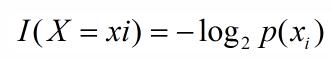
  I(x)用来表示随机变量的信息，p(xi)指是当xi发生时的概率。

　　熵是用来度量不确定性的，当熵越大，X=xi的不确定性越大，反之越小。对于机器学习中的分类问题而言，熵越大即这个类别的不确定性更大，反之越小。

　　信息增益在决策树算法中是用来选择特征的指标，信息增益越大，则这个特征的选择性越好。

　　这方面的内容不再细述，感兴趣的同学可以看 信息&熵&信息增益 这篇博文。

　　2）决策树

　　决策树是一种树形结构，其中每个内部节点表示一个属性上的测试，每个分支代表一个测试输出，每个叶节点代表一种类别。常见的决策树算法有C4.5、ID3和CART。

　　3）集成学习　

　　集成学习通过建立几个模型组合的来解决单一预测问题。它的工作原理是生成多个分类器/模型，各自独立地学习和作出预测。这些预测最后结合成单预测，因此优于任何一个单分类的做出预测。

　　随机森林是集成学习的一个子类，它依靠于决策树的投票选择来决定最后的分类结果。

## 4 随机森林的生成
前面提到，随机森林中有许多的分类树。我们要将一个输入样本进行分类，我们需要将输入样本输入到每棵树中进行分类。打个形象的比喻：森林中召开会议，讨论某个动物到底是老鼠还是松鼠，每棵树都要独立地发表自己对这个问题的看法，也就是每棵树都要投票。该动物到底是老鼠还是松鼠，要依据投票情况来确定，获得票数最多的类别就是森林的分类结果。森林中的每棵树都是独立的，99.9%不相关的树做出的预测结果涵盖所有的情况，这些预测结果将会彼此抵消。少数优秀的树的预测结果将会超脱于芸芸“噪音”，做出一个好的预测。将若干个弱分类器的分类结果进行投票选择，从而组成一个强分类器，这就是随机森林bagging的思想（关于bagging的一个有必要提及的问题：bagging的代价是不用单棵决策树来做预测，具体哪个变量起到重要作用变得未知，所以bagging改进了预测准确率但损失了解释性。）。下图可以形象地描述这个情况：
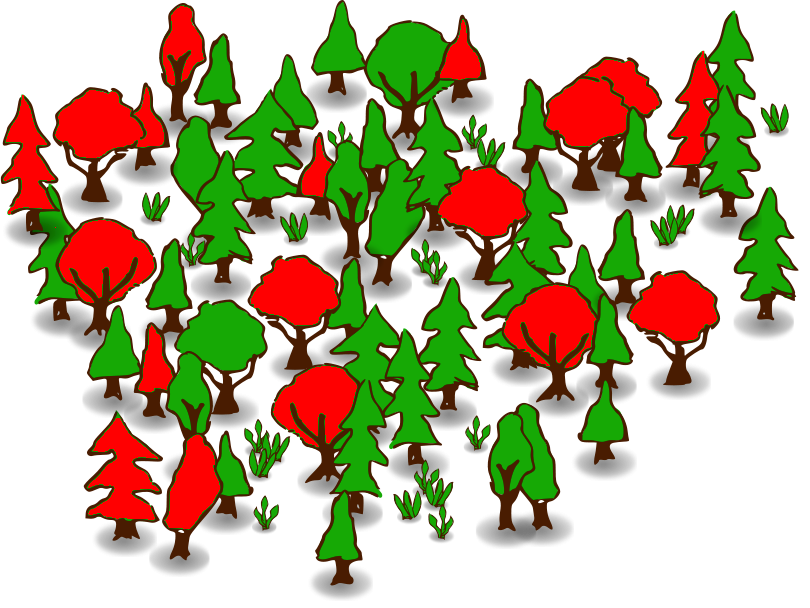
有了树我们就可以分类了，但是森林中的每棵树是怎么生成的呢？

　　每棵树的按照如下规则生成：

　　1）如果训练集大小为N，对于每棵树而言，随机且有放回地从训练集中的抽取N个训练样本（这种采样方式称为bootstrap sample方法），作为该树的训练集；

　　从这里我们可以知道：每棵树的训练集都是不同的，而且里面包含重复的训练样本（理解这点很重要）。

　　为什么要随机抽样训练集？（add @2016.05.28）

　　如果不进行随机抽样，每棵树的训练集都一样，那么最终训练出的树分类结果也是完全一样的，这样的话完全没有bagging的必要；

　　为什么要有放回地抽样？（add @2016.05.28）

　　我理解的是这样的：如果不是有放回的抽样，那么每棵树的训练样本都是不同的，都是没有交集的，这样每棵树都是"有偏的"，都是绝对"片面的"（当然这样说可能不对），也就是说每棵树训练出来都是有很大的差异的；而随机森林最后分类取决于多棵树（弱分类器）的投票表决，这种表决应该是"求同"，因此使用完全不同的训练集来训练每棵树这样对最终分类结果是没有帮助的，这样无异于是"盲人摸象"。

　　2）如果每个样本的特征维度为M，指定一个常数m<<M，随机地从M个特征中选取m个特征子集，每次树进行分裂时，从这m个特征中选择最优的；

　　3）每棵树都尽最大程度的生长，并且没有剪枝过程。

　　一开始我们提到的随机森林中的“随机”就是指的这里的两个随机性。两个随机性的引入对随机森林的分类性能至关重要。由于它们的引入，使得随机森林不容易陷入过拟合，并且具有很好得抗噪能力（比如：对缺省值不敏感）。

　　随机森林分类效果（错误率）与两个因素有关：

森林中任意两棵树的相关性：相关性越大，错误率越大；
森林中每棵树的分类能力：每棵树的分类能力越强，整个森林的错误率越低。
　　减小特征选择个数m，树的相关性和分类能力也会相应的降低；增大m，两者也会随之增大。所以关键问题是如何选择最优的m（或者是范围），这也是随机森林唯一的一个参数。



## 5 袋外错误率（oob error）
上面我们提到，构建随机森林的关键问题就是如何选择最优的m，要解决这个问题主要依据计算袋外错误率oob error（out-of-bag error）。

　　随机森林有一个重要的优点就是，没有必要对它进行交叉验证或者用一个独立的测试集来获得误差的一个无偏估计。它可以在内部进行评估，也就是说在生成的过程中就可以对误差建立一个无偏估计。

　　我们知道，在构建每棵树时，我们对训练集使用了不同的bootstrap sample（随机且有放回地抽取）。所以对于每棵树而言（假设对于第k棵树），大约有1/3的训练实例没有参与第k棵树的生成，它们称为第k棵树的oob样本。

　　而这样的采样特点就允许我们进行oob估计，它的计算方式如下：

　　（note：以样本为单位）

　　1）对每个样本，计算它作为oob样本的树对它的分类情况（约1/3的树）；

　　2）然后以简单多数投票作为该样本的分类结果；

　　3）最后用误分个数占样本总数的比率作为随机森林的oob误分率。

　　（文献原文：Put each case left out in the construction of the kth tree down the kth tree to get a classification. In this way, a test set classification is obtained for each case in about one-third of the trees. At the end of the run, take j to be the class that got most of the votes every time case n was oob. The proportion of times that j is not equal to the true class of n averaged over all cases is the oob error estimate. This has proven to be unbiased in many tests.）

　　oob误分率是随机森林泛化误差的一个无偏估计，它的结果近似于需要大量计算的k折交叉验证。

## 6 随机森林工作原理解释的一个简单例子
描述：根据已有的训练集已经生成了对应的随机森林，随机森林如何利用某一个人的年龄（Age）、性别（Gender）、教育情况（Highest Educational Qualification）、工作领域（Industry）以及住宅地（Residence）共5个字段来预测他的收入层次。

　　收入层次 :

　　　　Band 1 : Below $40,000

　　　　Band 2: $40,000 – 150,000

　　　　Band 3: More than $150,000

　　随机森林中每一棵树都可以看做是一棵CART（分类回归树），这里假设森林中有5棵CART树，总特征个数N=5，我们取m=1（这里假设每个CART树对应一个不同的特征）。
CART 1 : Variable Age
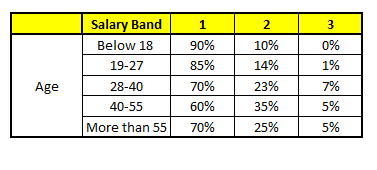
CART 2 : Variable Gender
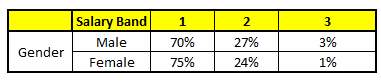
CART 3 : Variable Education
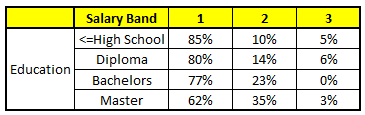
CART 4 : Variable Residence
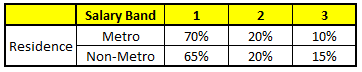
CART 5 : Variable Industry
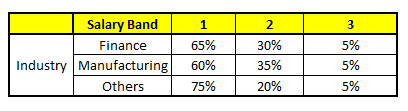
我们要预测的某个人的信息如下：

　　1. Age : 35 years ; 2. Gender : Male ; 3. Highest Educational Qualification : Diploma holder; 4. Industry : Manufacturing; 5. Residence : Metro.

　　根据这五棵CART树的分类结果，我们可以针对这个人的信息建立收入层次的分布情况：
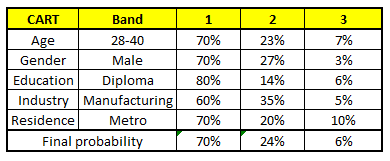
最后，我们得出结论，这个人的收入层次70%是一等，大约24%为二等，6%为三等，所以最终认定该人属于一等收入层次（小于$40,000）。



In [9]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,14,0,0
versicolor,0,9,1
virginica,0,2,14


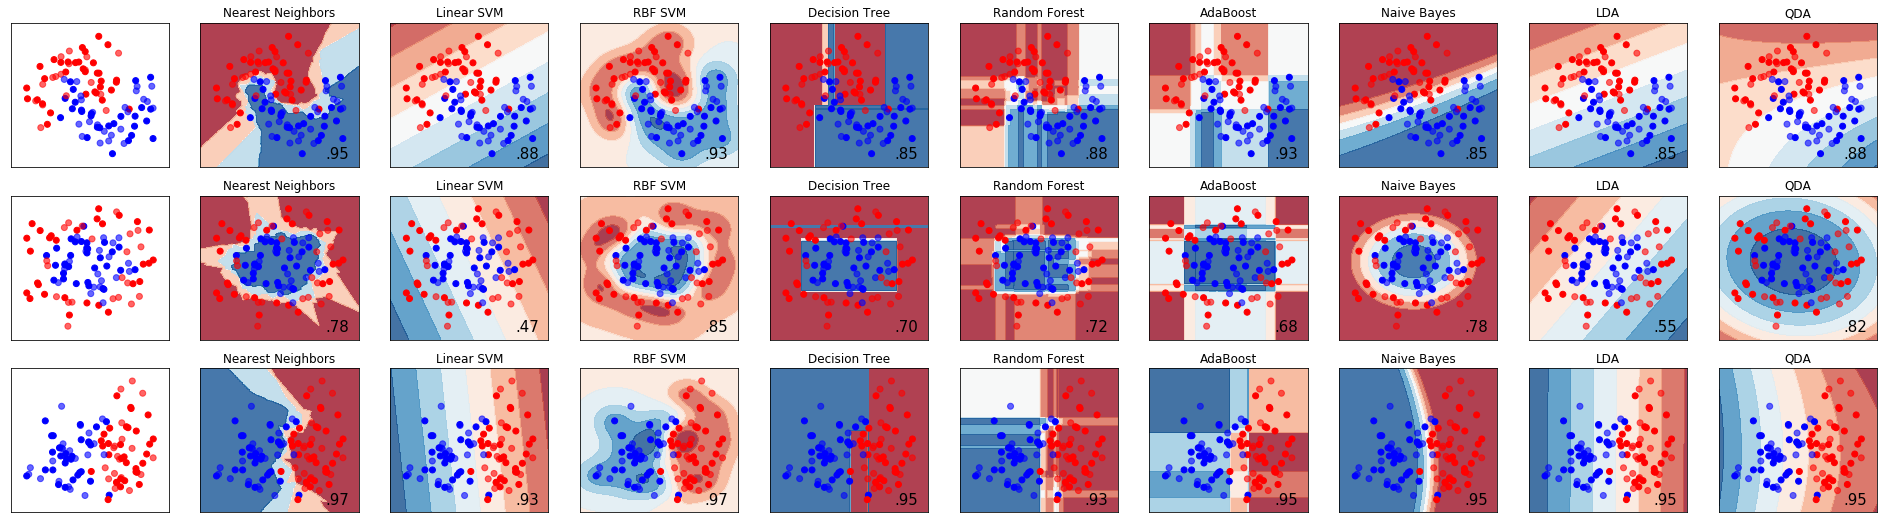

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()